In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import re
import unicodedata
import nltk
from collections import Counter
from itertools import chain
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc,classification_report,accuracy_score
from sklearn.model_selection import train_test_split
nltk.download('stopwords')
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
url = 'https://raw.githubusercontent.com/jarif87/DataSets/main/text_messages.csv'
df = pd.read_csv(url)
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
wordcloud_mask=np.array(Image.open("twitter.png"))
df.rename(columns={"Message": "text", "Category": "label"},inplace=True)
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.shape

(5572, 2)

In [7]:
df['label'].replace({'ham': 0, 'spam': 1}, inplace=True)
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
stopword = set(stopwords.words('english'))
print(stopword)

{'about', 'its', 'haven', 'when', 'ma', "mightn't", 'how', 'there', 'because', 'most', 'or', 'once', 'myself', 'm', 'doesn', 'up', 'won', "hasn't", 'herself', 'is', 'now', 'out', 'and', 'did', "isn't", "you'll", 'into', 'own', 'themselves', 'were', 'o', 'his', 'they', 'weren', 'if', 'was', 'hers', 'mustn', 'of', 'again', "haven't", 'through', 'ours', 'off', 'from', 'so', 'this', 'as', 'down', 'in', 'very', 'can', 'shouldn', 'than', 'have', 'which', 'other', 'i', 'until', 'just', 'before', 'will', 'her', "shan't", 'theirs', 'isn', "wasn't", 'with', "that'll", 'nor', 'him', "mustn't", 'be', 'couldn', "won't", 'are', 'what', 'whom', 'shan', 'hasn', 'do', 'more', 'me', 'ourselves', 'them', 'that', 'those', 'all', 's', 'a', 'over', 'some', "don't", 'aren', 'between', "shouldn't", 'below', 'no', 'here', "doesn't", 'we', 'don', 're', 'on', "hadn't", 'does', 'he', 'against', 't', 'itself', 'only', "you'd", 'the', 'ain', "needn't", 'under', 'she', "you're", "should've", 'such', 'at', 'should', 

In [9]:
file_id=stopwords.fileids()
print(file_id)

['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


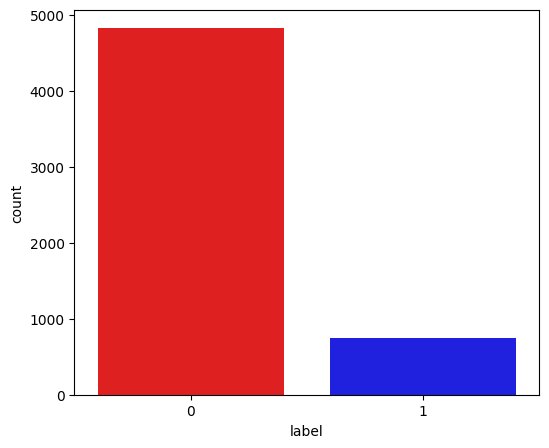

In [10]:
plt.figure(figsize=(6,5))
sns.countplot(x="label",data=df,palette=["red","blue"])
plt.show()

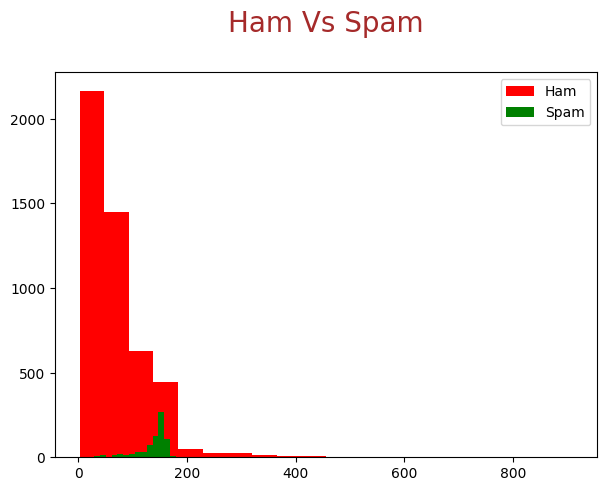

In [11]:
ham_len=df[df["label"]==0]["text"].str.len()
spam_len=df[df["label"]==1]["text"].str.len()
plt.figure(figsize=(7,5))
plt.hist(ham_len, bins=20,label='Ham',color="red")
plt.hist(spam_len , bins=20, label='Spam',color="green")
plt.title("Ham Vs Spam\n",fontsize=20,color="brown")
plt.legend()
plt.show()

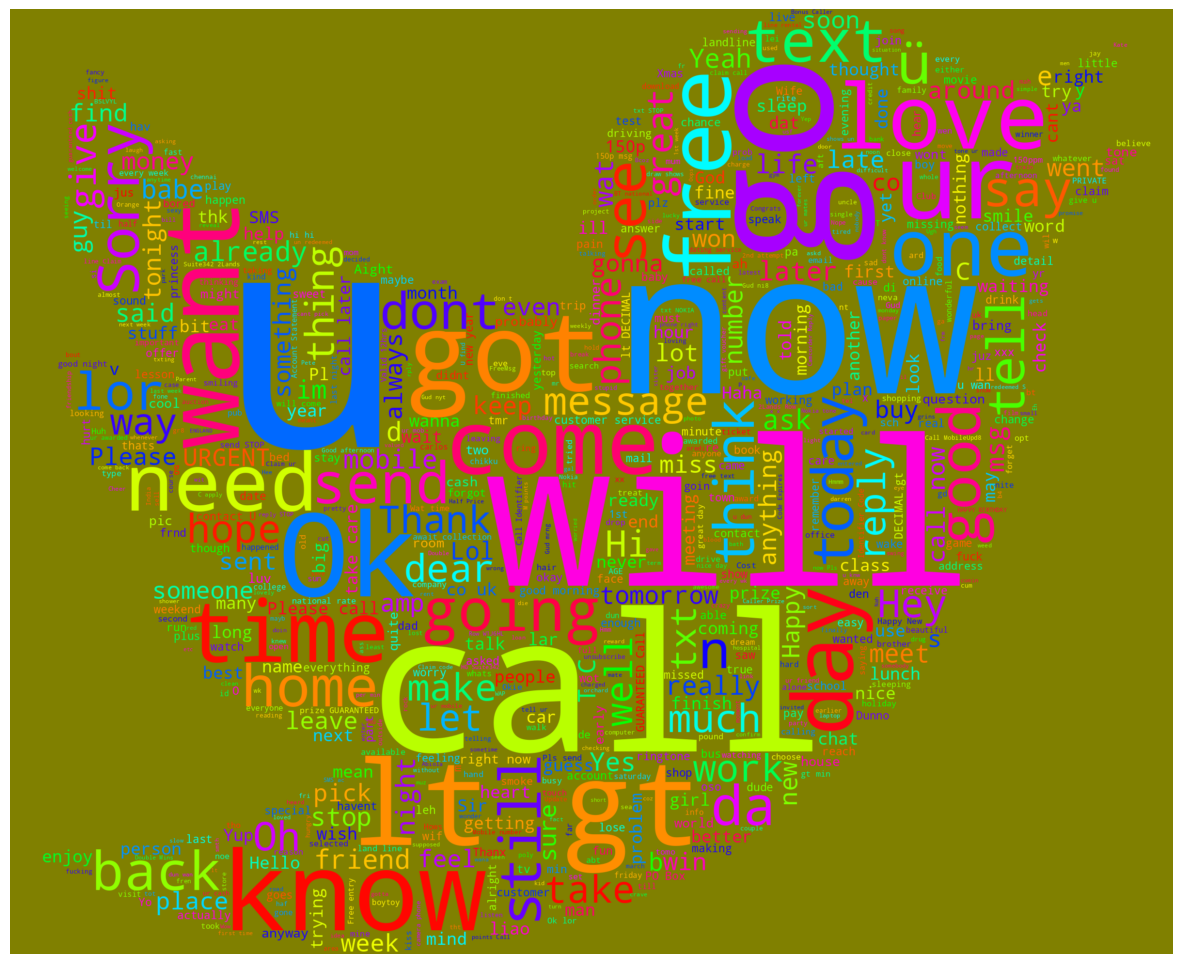

In [12]:
plt.figure(figsize=(15,15))
all_text=" ".join(df['text'].values.tolist())
wordcloud = WordCloud(width=700, height=700,stopwords=STOPWORDS, background_color='olive', max_words=800,colormap="hsv",mask=wordcloud_mask).generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

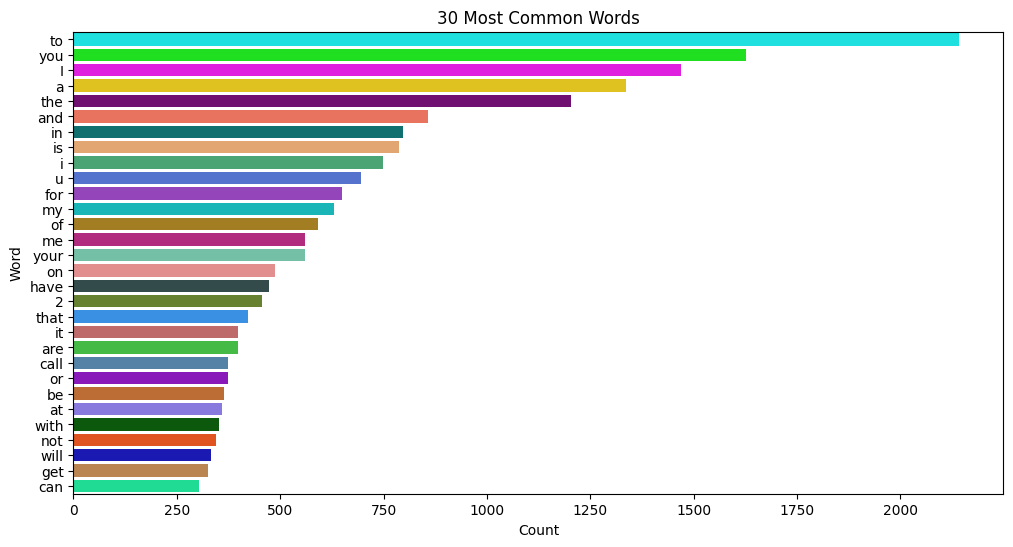

In [13]:
data_set =df["text"].str.split()
all_words = list(chain.from_iterable(data_set))
counter = Counter(all_words)
common_words = counter.most_common(30)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])

colors = ["cyan", "lime", "magenta", "gold", "purple", "tomato", "teal", "sandybrown", "mediumseagreen",
          "royalblue", "darkorchid", "darkturquoise", "darkgoldenrod", "mediumvioletred", "mediumaquamarine",
          "lightcoral", "darkslategray", "olivedrab", "dodgerblue", "indianred", "limegreen", "steelblue",
          "darkviolet", "chocolate", "mediumslateblue", "darkgreen", "orangered", "mediumblue", "peru", "mediumspringgreen"]

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Word', data=df_common_words, palette=colors)
plt.title('30 Most Common Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()